# Python e Finanças

### Uma das grandes aplicações do Python é para Finanças/Mercado Financeiro

### Não é bem uma integração, pois usaremos bibliotecas que já conhecemos, só que aplicadas a ativos financeiros

1. pandas
2. matplotlib
3. numpy

Essas são as 3 principais bibliotecas usadas. Então essencialmente é uma aplicação de tudo o que aprendemos nessas 3 bibliotecas.

Vamos instalar também o pandas_datareader para puxar cotações diretamente do yahoo finance. Use o pip para isso.

### Vamos analisar o IBOV

In [2]:
pip install pandas-datareader


     -------------------------------------- 109.5/109.5 kB 1.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

### Buscando as cotações

In [4]:
import yfinance as yf
import pandas as pd

start_date = '2020-01-01'
end_date = '2023-05-31'

cotacao_ibov = yf.download('^BVSP', start=start_date, end=end_date)
cotacao_ibov = pd.DataFrame(cotacao_ibov)

display(cotacao_ibov)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500
...,...,...,...,...,...,...
2023-05-24,109920.0,109920.0,108546.0,108800.0,108800.0,12980200
2023-05-25,108800.0,111115.0,108800.0,110054.0,110054.0,14745300
2023-05-26,110058.0,111706.0,109900.0,110906.0,110906.0,11019700


In [21]:
cotacao_ibov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847 entries, 2020-01-02 to 2023-05-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       847 non-null    float64
 1   High       847 non-null    float64
 2   Low        847 non-null    float64
 3   Close      847 non-null    float64
 4   Adj Close  847 non-null    float64
 5   Volume     847 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 46.3 KB


### Analisando o Gráfico

<AxesSubplot:xlabel='Date'>

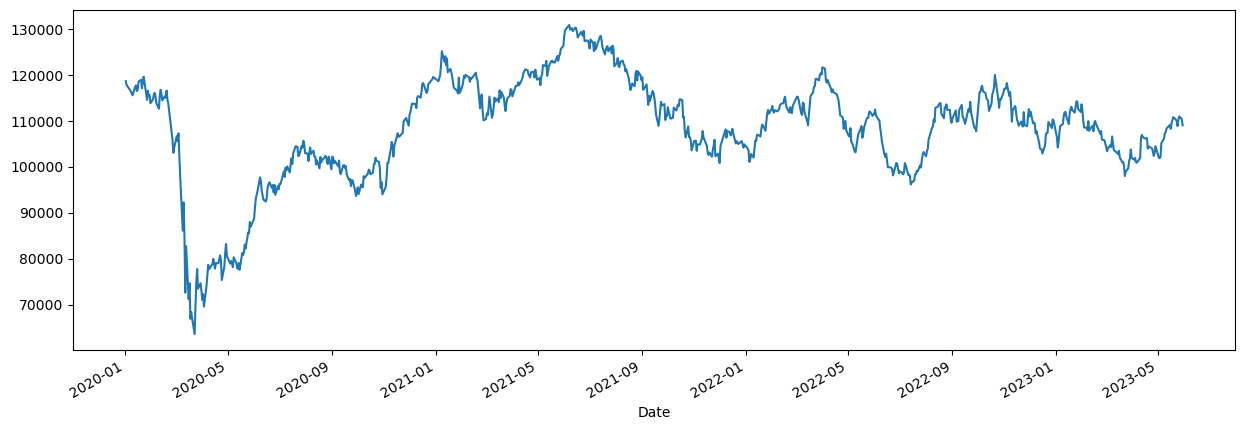

In [20]:
cotacao_ibov['Adj Close'].plot(figsize = (15, 5))

### Melhorando a aparencia do grafico

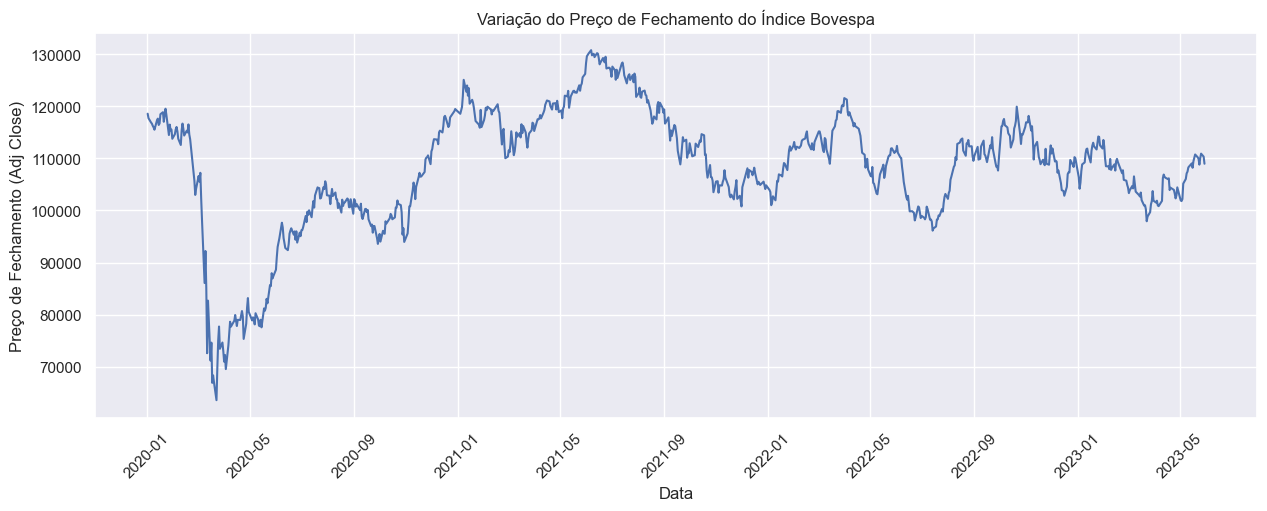

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o estilo do seaborn
sns.set(style="darkgrid")

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(15, 5))

# Plotando o gráfico
sns.lineplot(data=cotacao_ibov, x=cotacao_ibov.index, y="Adj Close", ax=ax)

# Configurando os rótulos e o título
ax.set_xlabel("Data")
ax.set_ylabel("Preço de Fechamento (Adj Close)")
ax.set_title("Variação do Preço de Fechamento do Índice Bovespa")

# Girando os rótulos do eixo x
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.show()

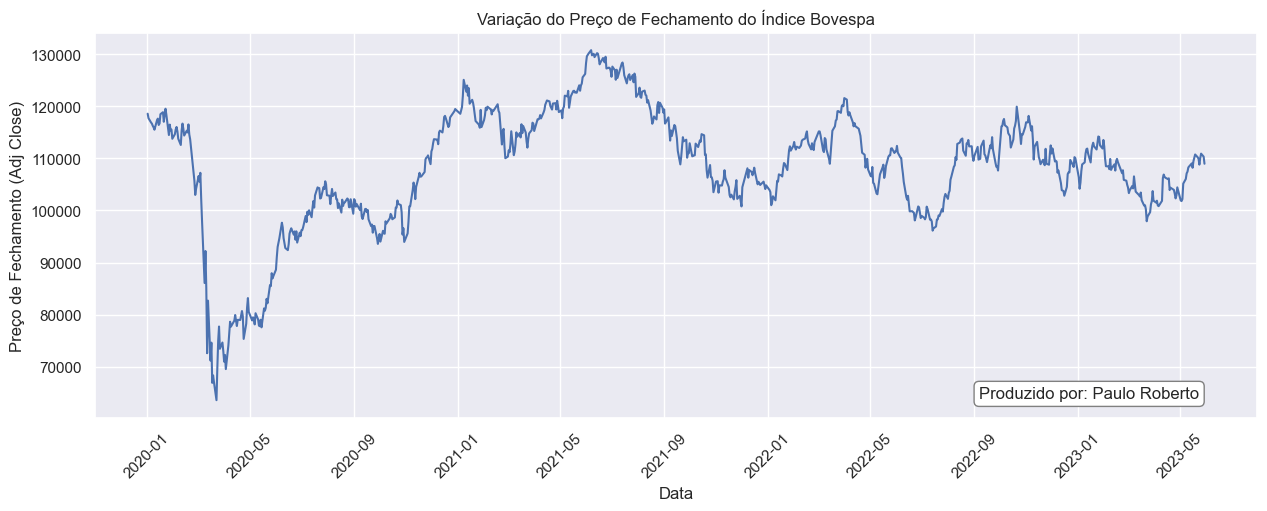

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o estilo do seaborn
sns.set(style="darkgrid")

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(15, 5))

# Plotando o gráfico
sns.lineplot(data=cotacao_ibov, x=cotacao_ibov.index, y="Adj Close", ax=ax)

# Configurando os rótulos e o título
ax.set_xlabel("Data")
ax.set_ylabel("Preço de Fechamento (Adj Close)")
ax.set_title("Variação do Preço de Fechamento do Índice Bovespa")

# Girando os rótulos do eixo x
plt.xticks(rotation=45)

# Adicionando a caixa de texto
ax.text(0.95, 0.05, "Produzido por: Paulo Roberto", transform=ax.transAxes,
        fontsize=12, ha='right', bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))

# Exibindo o gráfico
plt.show()

### Retorno do IBOV

In [22]:
retorno_ibov = cotacao_ibov['Adj Close'][-1] / cotacao_ibov['Adj Close'][0] - 1
print('Retorno de {:.2%}'.format(retorno_ibov))

Retorno de -8.10%


### Analisando com Média Móvel

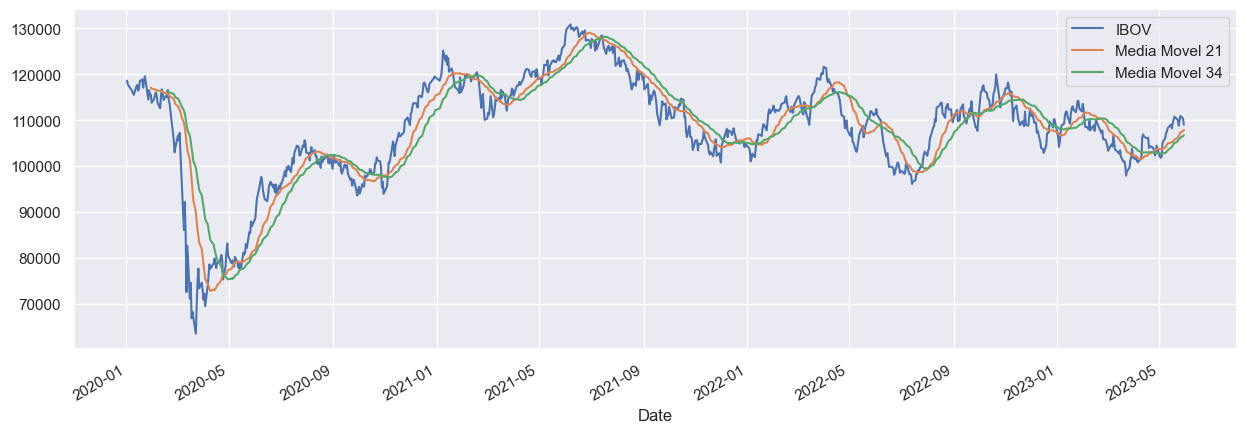

In [29]:
cotacao_ibov['Adj Close'].plot(figsize = (15, 5), label = 'IBOV')
cotacao_ibov['Adj Close'].rolling(21).mean().plot(label = 'Media Movel 21')
cotacao_ibov['Adj Close'].rolling(34).mean().plot(label = 'Media Movel 34')
plt.legend()
plt.show()

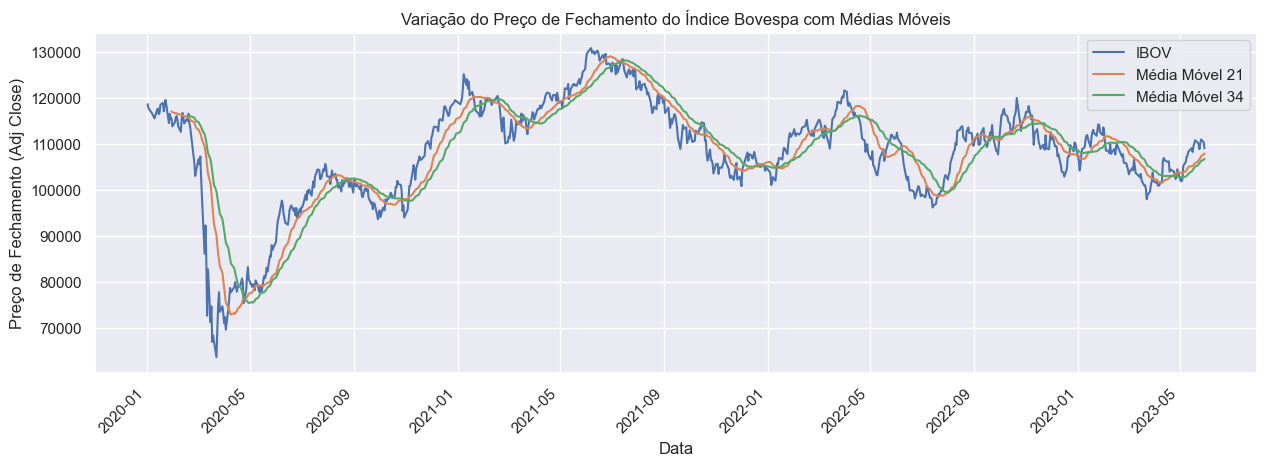

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o estilo do seaborn
sns.set(style="darkgrid")

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(15, 5))

# Plotando o gráfico de preço de fechamento
cotacao_ibov['Adj Close'].plot(ax=ax, label='IBOV')

# Plotando a média móvel de 21 períodos
cotacao_ibov['Adj Close'].rolling(21).mean().plot(ax=ax, label='Média Móvel 21')

# Plotando a média móvel de 34 períodos
cotacao_ibov['Adj Close'].rolling(34).mean().plot(ax=ax, label='Média Móvel 34')

# Configurando os rótulos e o título
ax.set_xlabel("Data")
ax.set_ylabel("Preço de Fechamento (Adj Close)")
ax.set_title("Variação do Preço de Fechamento do Índice Bovespa com Médias Móveis")

# Girando os rótulos do eixo x
plt.xticks(rotation=45)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.show()